In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
from pathlib import Path

In [5]:
lambd = 1/128
projd = np.logspace(7, 12, 6, base=2).astype(int)

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

def fit_powerlaw(arr,start,end):
	x_range = np.arange(start,end+1).astype(int)
	y_range = arr[x_range-1]	# because the first eigenvalue is at index 0, so eigenval_{start} is at index (start-1)
	reg = LinearRegression().fit(np.log(x_range).reshape(-1,1),np.log(y_range).reshape(-1,1))
	y_pred = np.exp(reg.coef_*np.log(x_range).reshape(-1,1)+reg.intercept_)
	return -reg.coef_[0][0], x_range, y_pred

def robust_fit_powerlaw(arr,start,end,verbose=False):
	window = int((end-start)/10)
	slope_arr = np.array([fit_powerlaw(arr,idx,idx+window)[0] for idx in range(start,end+1)])
	robust_slope = np.median(slope_arr)
	if verbose:
		print(robust_slope)
		import matplotlib.pyplot as plt
		x_range_plt = np.arange(start,end+1).astype(int)
		y_pred_full = np.exp(-robust_slope*np.log(x_range_plt)+np.log(arr[start-1])+robust_slope*np.log(start))
		plt.loglog(np.arange(1,1+arr.shape[0]),arr); 
		plt.loglog(x_range_plt,y_pred_full); 
		plt.show()
	return robust_slope

def stringer_get_powerlaw(ss, trange):
	# COPIED FROM Stringer+Pachitariu 2018b github repo! (https://github.com/MouseLand/stringer-pachitariu-et-al-2018b/blob/master/python/utils.py)
    ''' fit exponent to variance curve'''
    logss = np.log(np.abs(ss))
    y = logss[trange][:,np.newaxis]
    trange += 1
    nt = trange.size
    x = np.concatenate((-np.log(trange)[:,np.newaxis], np.ones((nt,1))), axis=1)
    w = 1.0 / trange.astype(np.float32)[:,np.newaxis]
    b = np.linalg.solve(x.T @ (x * w), (w * x).T @ y).flatten()
    
    allrange = np.arange(0, ss.size).astype(int) + 1
    x = np.concatenate((-np.log(allrange)[:,np.newaxis], np.ones((ss.size,1))), axis=1)
    ypred = np.exp((x * b).sum(axis=1))
    alpha = b[0]
    return alpha,ypred

In [37]:
pwd

'/data/krishna/research/fastssl/nb'

In [7]:
ckpt_dir = '/data/krishna/research/results/0319/001/checkpoints'

In [11]:
vals = []

for p in projd:
    ckpt_path = os.path.join(ckpt_dir, 'lambd_{:.6f}_pdim_{}'.format(lambd, p))
    ckpt_path = os.path.join(ckpt_path, 'eigen_ssl_100.npy')
    if os.path.exists(ckpt_path):
        eigspec = np.load(ckpt_path)
        alpha,ypred = stringer_get_powerlaw(eigspec,np.arange(10,min(2048,100)).astype(int))
        # print('{:.6f}_{}'.format(l, p), alpha)
        vals.append(alpha)


In [70]:
pvals = []

for p in projd:
    ckpt_path = os.path.join(ckpt_dir, 'lambd_{:.6f}_pdim_{}'.format(lambd, p))
    ckpt_path = os.path.join(ckpt_path, 'eigen_proj_ssl_100.npy')
    if os.path.exists(ckpt_path):
        eigspec = np.load(ckpt_path)
        alpha,ypred = stringer_get_powerlaw(eigspec,np.arange(10,min(2048,100)).astype(int))
        # print('{:.6f}_{}'.format(l, p), alpha)
        pvals.append(alpha)



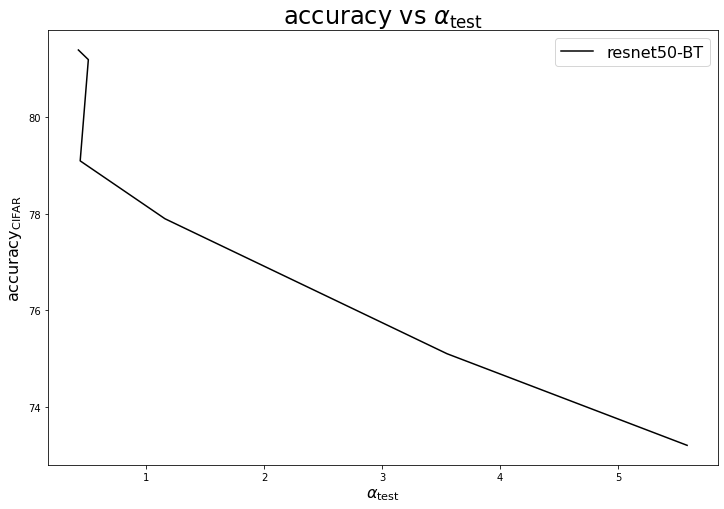

In [74]:
fig = plt.figure(figsize=(12, 8))
plt.plot(pvals, ac, color='black', label='resnet50-BT')
plt.xlabel(r'$\alpha_{\mathrm{test}}$', fontsize=16)
plt.ylabel(r'$\mathrm{accuracy}_{\mathrm{CIFAR}}$', fontsize=16)
plt.legend(fontsize=16)
plt.title(r'accuracy vs $\alpha_{\mathrm{test}}$', fontsize=24)
plt.savefig('accuracy_projalpha.svg')

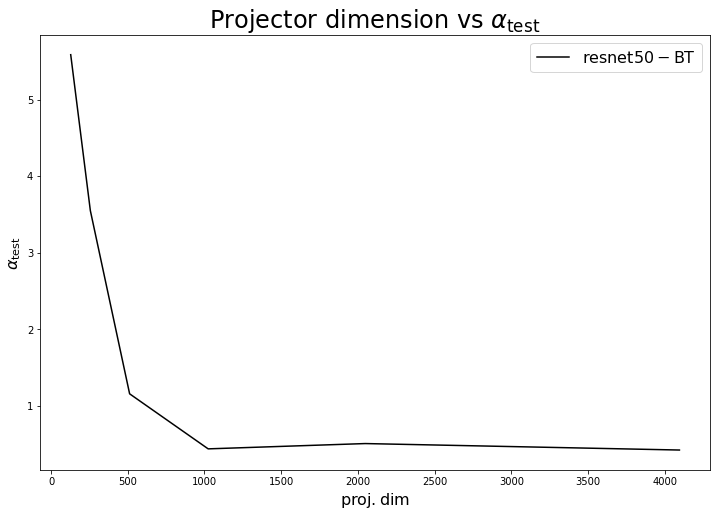

In [73]:
fig = plt.figure(figsize=(12, 8))
plt.plot(ps, pvals, color='black', label=r'$\mathrm{resnet50-BT}$')
# plt.xscale('log')
plt.ylabel(r'$\alpha_{\mathrm{test}}$', fontsize=16)
plt.xlabel(r'$\mathrm{proj. dim}$', fontsize=16)
plt.legend(fontsize=16)
plt.title(r'Projector dimension vs $\alpha_{\mathrm{test}}$', fontsize=24)
plt.savefig('projector_projalpha.svg')

In [ ]:
fig = plt.figure(figsize=(12, 8))
plt.plot(ps, ac, color='black', label=r'$\mathrm{resnet50-BT}$')
# plt.xscale('log')
plt.ylabel(r'$\mathrm{accuracy}}$', fontsize=16)
plt.xlabel(r'$\mathrm{proj. dim}$', fontsize=16)
plt.legend(fontsize=16)
plt.title(r'Projector dimension vs Accuracy', fontsize=24)
plt.savefig('projector_acc.svg')

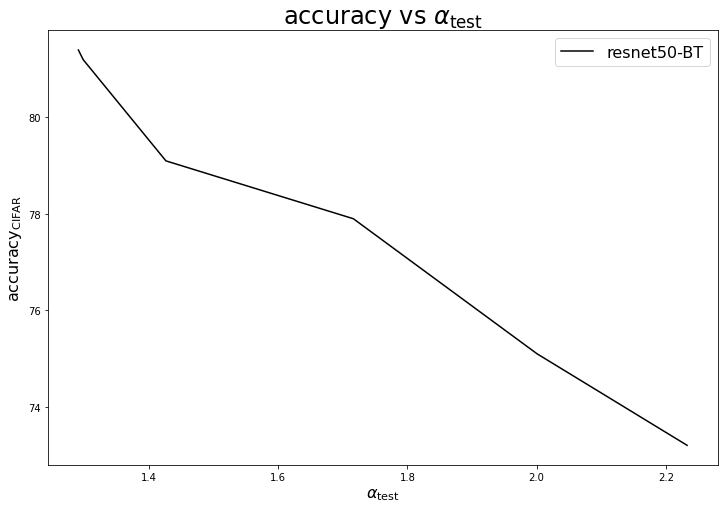

In [67]:
fig = plt.figure(figsize=(12, 8))
ps = [128, 256, 512, 1024, 2048, 4096]
ac = [73.2, 75.1, 77.9, 79.1, 81.2, 81.4]
# plt.plot(ps, ac, color='red')
# plt.plot(ps, vals, color='blue')
plt.plot(vals, ac, color='black', label='resnet50-BT')
# plt.tight_layout()
plt.xlabel(r'$\alpha_{\mathrm{test}}$', fontsize=16)
plt.ylabel(r'$\mathrm{accuracy}_{\mathrm{CIFAR}}$', fontsize=16)
plt.legend(fontsize=16)
plt.title(r'accuracy vs $\alpha_{\mathrm{test}}$', fontsize=24)
plt.savefig('accuracy_alpha.png',bbox_inches='tight', dpi=150)

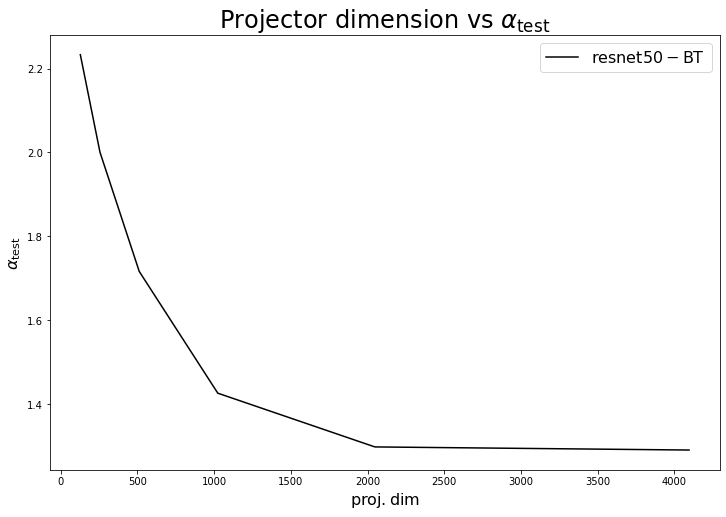

In [61]:
fig = plt.figure(figsize=(12, 8))
plt.plot(ps, vals, color='black', label=r'$\mathrm{resnet50-BT}$')
# plt.xscale('log')
plt.ylabel(r'$\alpha_{\mathrm{test}}$', fontsize=16)
plt.xlabel(r'$\mathrm{proj. dim}$', fontsize=16)
plt.legend(fontsize=16)
plt.title(r'Projector dimension vs $\alpha_{\mathrm{test}}$', fontsize=24)
plt.savefig('projector_alpha.svg')

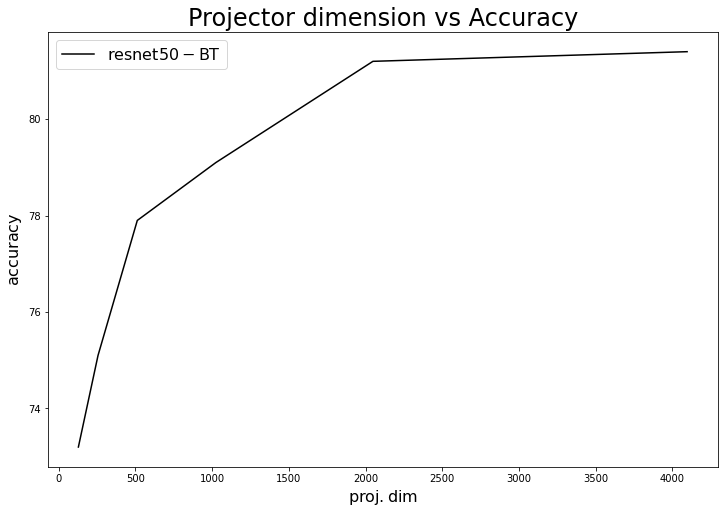

In [60]:
fig = plt.figure(figsize=(12, 8))
plt.plot(ps, ac, color='black', label=r'$\mathrm{resnet50-BT}$')
# plt.xscale('log')
plt.ylabel(r'$\mathrm{accuracy}}$', fontsize=16)
plt.xlabel(r'$\mathrm{proj. dim}$', fontsize=16)
plt.legend(fontsize=16)
plt.title(r'Projector dimension vs Accuracy', fontsize=24)
plt.savefig('projector_acc.svg')

In [84]:
vals = []
ps = []
for p in projd:
    cal = []
    for l in lambd:
        ckpt_path = os.path.join(ckpt_dir, 'lambd_{:.6f}_pdim_{}'.format(l, p))
        ckpt_path = os.path.join(ckpt_path, 'eigen_ssl_30.npy')
        if os.path.exists(ckpt_path):
            eigspec = np.load(ckpt_path)
            alpha,ypred = stringer_get_powerlaw(eigspec,np.arange(10,min(2048,100)).astype(int))
            # print('{:.6f}_{}'.format(l, p), alpha)
            cal.append(alpha)
            ps.append(p)
            # ps.append(p)
    vals.append(cal)
ps=set(ps)
print(ps)

{128, 256, 2048, 512, 1024}


IndexError: list index out of range

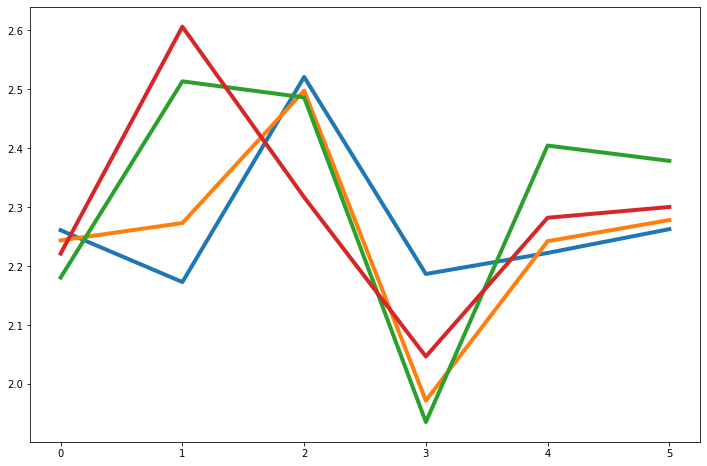

In [87]:
fig = plt.figure(figsize=(12, 8))
ps = list(ps)
for idx, l in enumerate(vals):
    plt.plot(l, label='{:.6f}'.format(ps[idx]), linewidth=4)
# plt.xscale('log')
plt.legend()

In [15]:
ps = [128, 256, 512, 1024, 2048]
ac = [73.2, 75.1, 76.5, 78, 79]
pac = [20.1, 20.9, 25.6]
plt.plot(ps, ac, color='red')
plt.plot(ps, vals, color='blue)

In [76]:
pvals

[5.586342836288178,
 3.5508795372317032,
 1.159441093773186,
 0.44096584740048195,
 0.5101208290698771,
 0.4256730081036212]